<!-- dom:TITLE: Demo - Eigenvalues on the Möbius strip -->
# Demo - Eigenvalues on the Möbius strip
<!-- dom:AUTHOR: Mikael Mortensen Email:mikaem@math.uio.no at Department of Mathematics, University of Oslo. -->
<!-- Author: -->  
**Mikael Mortensen** (email: `mikaem@math.uio.no`), Department of Mathematics, University of Oslo.

Date: **Dec 22, 2020**

Copyright 2020, Mikael Mortensen. Released under CC Attribution 4.0 license

**Summary.** This is a demonstration of how the Python module [shenfun](https://github.com/spectralDNS/shenfun) can be used to
compute eigenvalues and vectors of the Laplace-Beltrami
operator on a Möbius strip. The absolute value of the eigenvector
corresponding to the eigth smallest eigenvalue $\lambda=8.054788196$
is shown in the figure below, read on to see how it was computed.

<!-- dom:FIGURE: [https://cdn.jsdelivr.net/gh/spectralDNS/spectralutilities@master/figures/moebius8_trans.png] -->
<!-- begin figure -->

<p></p>
<img src="https://cdn.jsdelivr.net/gh/spectralDNS/spectralutilities@master/figures/moebius8_trans.png" >

<!-- end figure -->













## The Möbius strip

A Möbius strip is the simplest non-orientable surface embedded in
$\mathbb{R}^3$. There are several realizations possible, and we
will here consider the one parametrized by [[Kalvoda2020]](#Kalvoda2020)

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
    x(\theta, t) = \left(R-t\cos\frac{\theta}{2R}\right) \cos \frac{\theta}{R}, 
\label{_auto1} \tag{1}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}  
    y(\theta, t) = \left(R-t\cos\frac{\theta}{2R}\right) \sin \frac{\theta}{R}, 
\label{_auto2} \tag{2}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}  
    z(\theta, t) = -t \sin \frac{\theta}{2 R},
\label{_auto3} \tag{3}
\end{equation}
$$

where $R$ is the main radius of the strip. $\theta$ is the parameter that determines
the angle for moving around the strip, like the angle of a circle.
For one trip around the strip move $\theta$ from $\theta_0$ to $\theta_0+2\pi R$.
A function in Cartesian coordinates $u(\mathbf{x})$ for $\mathbf{x} \in \mathbb{R}^3$
is mapped to computational coordinates as $u(\mathbf{x}) = \tilde{u}(\theta, t)$.
By moving once around the strip a function can be seen to be twisted periodic,
such that

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
    \tilde{u}(\theta_0, t) = \tilde{u}(\theta_0 + 2\pi R, -t), 
\label{_auto4} \tag{4}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}  
    \frac{\partial \tilde{u}}{\partial \theta}(\theta_0, t) = \frac{\partial \tilde{u}}{\partial \theta}(\theta_0 + 2\pi R, -t).
\label{_auto5} \tag{5}
\end{equation}
$$

The twisted condition does not lend itself easily to a regular tensor
product basis. On the other hand, by moving twice around the strip,
regular periodic boundary conditions

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
    \tilde{u}(\theta_0, t) = \tilde{u}(\theta_0 + 4\pi R, t),
\label{_auto6} \tag{6}
\end{equation}
$$

will apply [[Kalvoda2020]](#Kalvoda2020), and we can discretize using Fourier
exponentials in the $\theta$-direction. Since the reference domain of Fourier
exponentials is $[-\pi, \pi]$ we define $\varphi = \theta /(2 R)$, such that
the computational domain is $(\varphi, t) \in \mathbb{I}^2 = [-\pi, \pi] \times [-1, 1]$,
with the parametrization

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
    x(\varphi, t) = \left(R-t\cos {\varphi}\right) \cos {2 \varphi}, 
\label{_auto7} \tag{7}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}  
    y(\varphi, t) = \left(R-t\cos {\varphi}\right) \sin {2 \varphi}, 
\label{_auto8} \tag{8}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation}  
    z(\varphi, t) = -t \sin {\varphi}.
\label{_auto9} \tag{9}
\end{equation}
$$

Note that the reference domain corresponds to $(\theta, t) \in = [-2\pi R, 2\pi R] \times [-1, 1]$.
It is also trivial to adjust the $t$-domain with an affine map for a more narrow or
wider strip, but this added complexity is not discussed here. One can simply
choose the width of the strip below when choosing function space for the
$t$-direction.

For the $t$-direction, a mixed Legendre,
$\psi_{i} = L_{i} - L_{i+2}$, or Chebyshev, $\psi_{i} = T_{i} - T_{i+2}$,
basis can be used and we obtain a regular tensor product basis.
The Legendre basis leads to more sparse matrices, and will be chosen
as default, but Chebyshev also works just fine.
Note that the same problem is
solved by Kalvoda et al. [[Kalvoda2020]](#Kalvoda2020) using a tensor product
basis with Fourier exponentials for the $\theta$-direction and a mix
of cosines and sines for the $t$-direction. Kalvoda et al. cannot
make use of tensor product matrices and integrates using a
two-dimensional quadrature scheme over the entire domain, leading
to a dense matrix. We will here only use 1D quadrature and
tensor products to get the coefficient matrix.

## The Laplace Beltrami operator

We consider the eigenvalue problem of the
Laplace Beltrami operator by solving

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation}
    -\nabla^2 u(\mathbf{x}) = \lambda u(\mathbf{x}), \quad \text{ for } \mathbf{x} \in \Omega,
\label{_auto10} \tag{10}
\end{equation}
$$

where $u$ is the solution, $\lambda$ the eigenvalues and $\Omega$ the Möbius
strip. We consider only homogeneous Dirichlet boundary conditions on the boundary.

To solve this problem with the spectral Galerkin method we
choose an appropriate space $V$ and find $u\in V$ such that

$$
\int_{\Omega} -\nabla^2 u \, v^* \omega d\sigma = \int_{\Omega} \lambda u v^* \omega d\sigma, \quad \forall v \in V
$$

where $v^*$ is the complex conjugate of the test function $v$.

With shenfun it is enough to operate in general coordinates as above
and let the curvilinear mathematics all happen under the hood.
However, for this example it is interesting to see what the
Laplace-Beltrami operator looks like in computational coordinates.
This is quite a bit of work by hand, and the starting point
is the position vector

<!-- Equation labels as ordinary links -->
<div id="_auto11"></div>

$$
\begin{equation}
\mathbf{r} = x(\varphi, t) \mathbf{i} + y(\varphi, t) \mathbf{j} + z(\varphi, t) \mathbf{k}.
\label{_auto11} \tag{11}
\end{equation}
$$

From the position vector we compute the he covariant
basis vectors $\mathbf{b}_i = \partial \mathbf{r} / \partial X^{i}$,
where $\mathbf{X} = \{X^{i}\}_{i\in(1,2)} = (\varphi, t)$,
and get the covariant metric tensor $g_{ij}=\mathbf{b}_i \cdot \mathbf{b}_j$
and its determinant $g = \text{det}\{g_{ij}\}$. We get

<!-- Equation labels as ordinary links -->
<div id="_auto12"></div>

$$
\begin{equation}
    {g} = (2R-2t\cos \varphi)^2+t^2.
\label{_auto12} \tag{12}
\end{equation}
$$

and

$$
g_{ij} =
\begin{pmatrix}
  g & 0 \\ 
  0 & 1
\end{pmatrix}
$$

Likewise, the contravariant metric tensor $g^{ij}$ is the
inverse of the covariant

$$
g^{ij} =
\begin{pmatrix}
  \frac{1}{g} & 0 \\ 
  0 & 1
\end{pmatrix}
$$

Please note that all these metrics and other terms are computed
under the hood by shenfun, and a user does not normally have to worry
about these.

It can be shown that the Laplace-Beltrami operator in curvilinear coordinates
is given as

<!-- Equation labels as ordinary links -->
<div id="_auto13"></div>

$$
\begin{equation}
\nabla^2 \tilde{u} = \frac{1}{\sqrt{g}}\frac{\partial}{\partial X^{i}}\left( g^{ij}\sqrt{g} \frac{\partial \tilde{u}}{\partial X^{j}}\right),
\label{_auto13} \tag{13}
\end{equation}
$$

with summation on repeated indices.
Using this and the surface element $d\sigma=\sqrt{g} d\varphi dt$, the
variational form in computational coordinates becomes

<!-- Equation labels as ordinary links -->
<div id="_auto14"></div>

$$
\begin{equation}
    -\int_{\mathbb{I}^2}\frac{\partial}{\partial X^{i}}\left( g^{ij}\sqrt{g} \frac{\partial \tilde{u}}{\partial X^{j}}\right) \, \tilde{v}^*\, \tilde{\omega} d\varphi dt = \int_{\mathbb{I}^2} \lambda \tilde{u} \tilde{v}^*\, \tilde{\omega}\sqrt{g} d\varphi dt,
\label{_auto14} \tag{14}
\end{equation}
$$

Summing and expanding some derivatives, we get

$$
\begin{align*}
    -\int_{\mathbb{I}^2}  \Big\{ \frac{1}{\sqrt{g}}\frac{\partial^2 \tilde{u}}{\partial \varphi^2 } &+\frac{4 t \sin \varphi \left(t \cos {\varphi} -R \right) }{g^{\frac{3}{2}}}\frac{\partial \tilde{u}}{\partial \varphi  } \notag \\ 
    & +\sqrt{g}\frac{\partial^2 \tilde{u}}{\partial t^2 }
    +\frac{4 \cos {\varphi} (t \cos \varphi -R) + t}{ \sqrt{g}}\frac{\partial  \tilde{u}}{\partial t  }  \Big\} \tilde{v}^* \tilde{\omega} d\varphi dt \notag \\ 
    &= \int_{\mathbb{I}^2} \lambda \tilde{u} \tilde{v}^* \tilde{\omega} \sqrt{g} d\varphi dt,
\end{align*}
$$

Note that the variational problem contains unseparable variable coefficients,
like $1/\sqrt{g}$ and $\sqrt{g}$ and as such cannot
easily be solved using efficient tensor product algebra.
However, note that both $g$ and $g^2$ are separable (i.e., they can
be written as products of simpler functions separated by the arguments
$g(\varphi, t) = \sum_k g_1^k(\varphi)g_2^k(t)$),
and using the unconventional weight $\tilde{\omega} = g^{3/2}$ we get

$$
\begin{align*}
    -\int_{\mathbb{I}^2}  \Big\{ g \frac{\partial^2 \tilde{u}}{\partial \varphi^2 } &+ {4 t \sin \varphi \left(t \cos {\varphi} -R \right) } \frac{\partial \tilde{u}}{\partial \varphi  } \notag \\ 
    & + g^2 \frac{\partial^2 \tilde{u}}{\partial t^2 }
    +g \left({4 \cos {\varphi} (t \cos \varphi -R) + t} \right) \frac{\partial  \tilde{u}}{\partial t  }  \Big\} \tilde{v}^* d\varphi dt \notag \\ 
    &= \int_{\mathbb{I}^2} \lambda g^{2} \tilde{u} \tilde{v}^* d\varphi dt,
\end{align*}
$$

where the left hand side can be assembled using tensor product matrices,
where no single 1D matrix has more than 9 diagonals.

Fortunately we do not have to do all this by hand since we have a
software that automatically assembles such matrices for us.
Now let's see how this problem can be handled with shenfun.

## Implementation

First we need to create function spaces for each direction $\varphi$
and $t$, and then a tensor product space from the two. We use the
parametrization given above and shenfun will then automatically
differentiate to create basis functions and metrics, like $g$.
One important factor, though. Sympy's [simplify](https://docs.sympy.org/latest/modules/simplify/simplify.html)
will sometimes have problems finding the best possible simplification
of a term, like $g$. And in this particular case we need
to discourage the use of powers, or else sympy will end up with a
much more complicated $g$ than we get below.

In [1]:
from shenfun import *
import sympy as sp
from IPython.display import Math, Latex, display
from scipy.sparse.linalg import eigs

phi, t = psi = sp.symbols('x,y', real=True)

RR = sp.Rational(132, 20)/sp.pi # Same as Kalvoda et al
#RR = 2
# Use a symbolic R first, then later substitute for the value in RR
R = sp.Symbol('R', real=True, positive=True)
rv = ((R-t*sp.cos(phi))*sp.cos(2*phi),
      (R-t*sp.cos(phi))*sp.sin(2*phi),
       -t*sp.sin(phi))

def discourage_powers(expr):
    POW = sp.Symbol('POW')
    count = sp.count_ops(expr, visual=True)
    count = count.replace(POW, 100)
    count = count.replace(sp.Symbol, type(sp.S.One))
    return count

N = (80, 40)
B0 = FunctionSpace(N[0], 'F', domain=(-np.pi, np.pi), dtype='D')
B1 = FunctionSpace(N[1], 'L', bc=(0, 0), domain=(-0.75, 0.75)) # Use same domain as Kalvoda et al
T = TensorProductSpace(comm, (B0, B1), coordinates=(psi, rv, True, (), discourage_powers), axes=(1, 0))

u = TrialFunction(T)
v = TestFunction(T)

Note the `discourage_powers` function. Try to turn it off (if
you are watching this in an interactive setting) and see what happens
to, e.g., `T.coors.sg`, which is $\sqrt{g}$.

We can now check to see what the Laplace-Beltrami operator
looks like when computed with shenfun:

In [2]:
g = sp.Function('g')(phi, t)
replace = [(T.coors.sg**2, g)]
Math((div(grad(u))).tolatex(funcname='f', symbol_names={phi:'\\varphi', t:'t'}, replace=replace))

<IPython.core.display.Math object>

Not surprisingly, this is the same (except not multiplied by $\sqrt{g}$) as what
is seen in the variational form above.

At this point we replace the symbol R with a number  in order to
assemble floating point matrices. The number R can be changed
above as the variable `RR`. For now it is set to use a value used also
by Kalvoda et al., such that we can doublecheck our eigenvalues.
We multiply forms with
$g^{3/2}$ before assembling to get separable variational forms,
leading to sparse tensor product matrices.

In [3]:
T.coors.subs(R, RR)
M = inner(v*T.coors.sg**3, -div(grad(u)), level=2)
B = inner(v*T.coors.sg**3, u, level=2)

Here `M` and `B` are lists of instances of the tensor product
matrix class [TPMatrix](https://shenfun.readthedocs.io/en/latest/shenfun.html#shenfun.matrixbase.TPMatrix).

In [4]:
print(f'Number of matrices for M = {len(M)} and B = {len(B)}')

Number of matrices for M = 23 and B = 9


So quite a few matrices, but they are all sparse. We solve by
using a Kronecker product solver [Solver2D](https://shenfun.readthedocs.io/en/latest/shenfun.html#shenfun.la.Solver2D) that flattens the
tensor product matrices and solution vector C-style.

In [5]:
mm = la.Solver2D(M)
bb = la.Solver2D(B)
Mc = mm.M.copy()
Bc = bb.M.copy()

Finally, solve the eigenvalue problem using a sparse eigenvalue solver
from scipy, which is wrapping ARPACK. Note that ARPACK is better at
finding large than small eigenvalues and for this reason we use a shift-inverted
version, see [https://docs.scipy.org/doc/scipy/reference/tutorial/arpack.html](https://docs.scipy.org/doc/scipy/reference/tutorial/arpack.html).

In [6]:
f = eigs(Mc, k=40, M=Bc, which='LM', sigma=0)

We have now found all eigenvalues on the Möbius strip with two rotations. So
some of the eigenvalues/eigenvectors will not have the correct twisted
periodic boundary conditions. To get only the correct eigenvalues, we filter a little
bit, checking the boundary:

In [7]:
u_hat = Function(T)
eigvals = []
for i in range(f[1].shape[1]):
    u_hat[:, :-2] = np.reshape(f[1][:, i], T.dims())
    tt = u_hat.eval(np.array([[-np.pi, 0, -np.pi, 0], [0.5, -0.5, 0.65, -0.65]]))
    dt = Dx(u_hat, 0, 1).eval(np.array([[-np.pi, 0, -np.pi, 0], [0.5, -0.5, 0.65, -0.65]]))
    # Check for twisted periodic
    if abs(tt[0]-tt[1]+tt[2]-tt[3]) < 1e-7 and abs(dt[0]-dt[1]+dt[2]-dt[3]) < 1e-8:
        eigvals.append((i, f[0][i].real))
        print(f'Twisted eigenvalue {len(eigvals):2d} {i:2d} {f[0][i].real:2.12e} Error {np.linalg.norm(Mc*f[1][:, i] - f[0][i]*Bc*f[1][:, i]):2.4e}')

Twisted eigenvalue  1  0 4.387440183533e+00 Error 5.2741e-13
Twisted eigenvalue  2  3 4.621048650216e+00 Error 7.5566e-13
Twisted eigenvalue  3  4 4.619975211630e+00 Error 1.8588e-12
Twisted eigenvalue  4  7 5.311812035824e+00 Error 9.4489e-13
Twisted eigenvalue  5  8 5.311812018902e+00 Error 9.5465e-13
Twisted eigenvalue  6 11 6.459281503707e+00 Error 1.0752e-12
Twisted eigenvalue  7 12 6.459281503733e+00 Error 1.6830e-12
Twisted eigenvalue  8 13 8.054788196218e+00 Error 6.3575e-13
Twisted eigenvalue  9 16 8.054788196218e+00 Error 1.8742e-12
Twisted eigenvalue 10 19 1.008763663159e+01 Error 1.1358e-12
Twisted eigenvalue 11 20 1.008763663159e+01 Error 3.5871e-12
Twisted eigenvalue 12 23 1.254476514934e+01 Error 3.1354e-12
Twisted eigenvalue 13 24 1.254476514934e+01 Error 6.1046e-12
Twisted eigenvalue 14 27 1.541145063366e+01 Error 2.7890e-12
Twisted eigenvalue 15 28 1.541145063366e+01 Error 1.2569e-11
Twisted eigenvalue 16 32 1.759842598374e+01 Error 3.1186e-12
Twisted eigenvalue 17 33

These are the lowest true eigenvalues of the Möbius strip.
We note that they are very similar to Table 2 in [[Kalvoda2020]](#Kalvoda2020). We can now
plot the eigenvectors using, e.g., mayavi or plotly.
Choose the eigenvalue number first and then the rest follows

In [8]:
l = 7
u_hat[:, :-2] = np.reshape(f[1][:, eigvals[l][0]], T.dims())
u_hat2 = u_hat.refine([2*N[0], 2*N[1]])
N0 = u_hat2.function_space().shape(False)[0]//2+1
fig = surf3D(u_hat2, slices=(slice(0, N0), slice(None)))
fig.show()

Or make subplot of several of the eigenvectors:

In [9]:
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
rows = 3
cols = 2
fig = make_subplots(rows=rows, cols=cols, start_cell="top-left", specs=[[dict(type='surface')]*cols]*rows,
                    subplot_titles=(f'$\lambda_1={eigvals[0][1]:2.5f}$', f'$\lambda_3={eigvals[2][1]:2.5f}$',
                                    f'$\lambda_5={eigvals[4][1]:2.5f}$', f'$\lambda_7={eigvals[6][1]:2.5f}$',
                                    f'$\lambda_9={eigvals[8][1]:2.5f}$', f'$\lambda_{{11}}={eigvals[10][1]:2.5f}$'))
N0 = T.shape(False)[0]//2+1 # Remember, data is for two rounds around the strip, we need only 1
x, y, z = T.local_cartesian_mesh()
x, y, z = x[:N0], y[:N0], z[:N0]
d = {'visible': False, 'showgrid': False, 'zeroline': False}
for l in range(rows*cols):
    u_hat[:, :-2] = np.reshape(f[1][:, eigvals[2*l][0]], T.dims())
    s = go.Surface(x=x, y=y, z=z, surfacecolor=abs(u_hat.backward()[:N0]),
                   colorscale=plotly.colors.sequential.Jet,
                   showscale=False)
    fig.add_trace(s, row=l//cols+1, col=l%cols+1)
    scene = 'scene' if l == 0 else f'scene{l+1}'
    fig.update_layout({scene: {'xaxis': d, 'yaxis': d, 'zaxis': d, 'camera': {'eye': dict(x=0.85, y=0.85, z=0.85)}}})
fig.show()

Finally, plot the sparsity pattern of the coefficient matrix. You
need to zoom in order to see the pattern properly and for
this reason we use plotly instead of the more convenient
matplotlib [spy](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.spy.html)
function (`%matplotlib notebook` does not work in an
interactive jupyterlab and as such a jupyter book session).
If you are curious, then please change basis to Chebyshev and
note the difference from Legendre. Otherwise, results should be very
much alike.


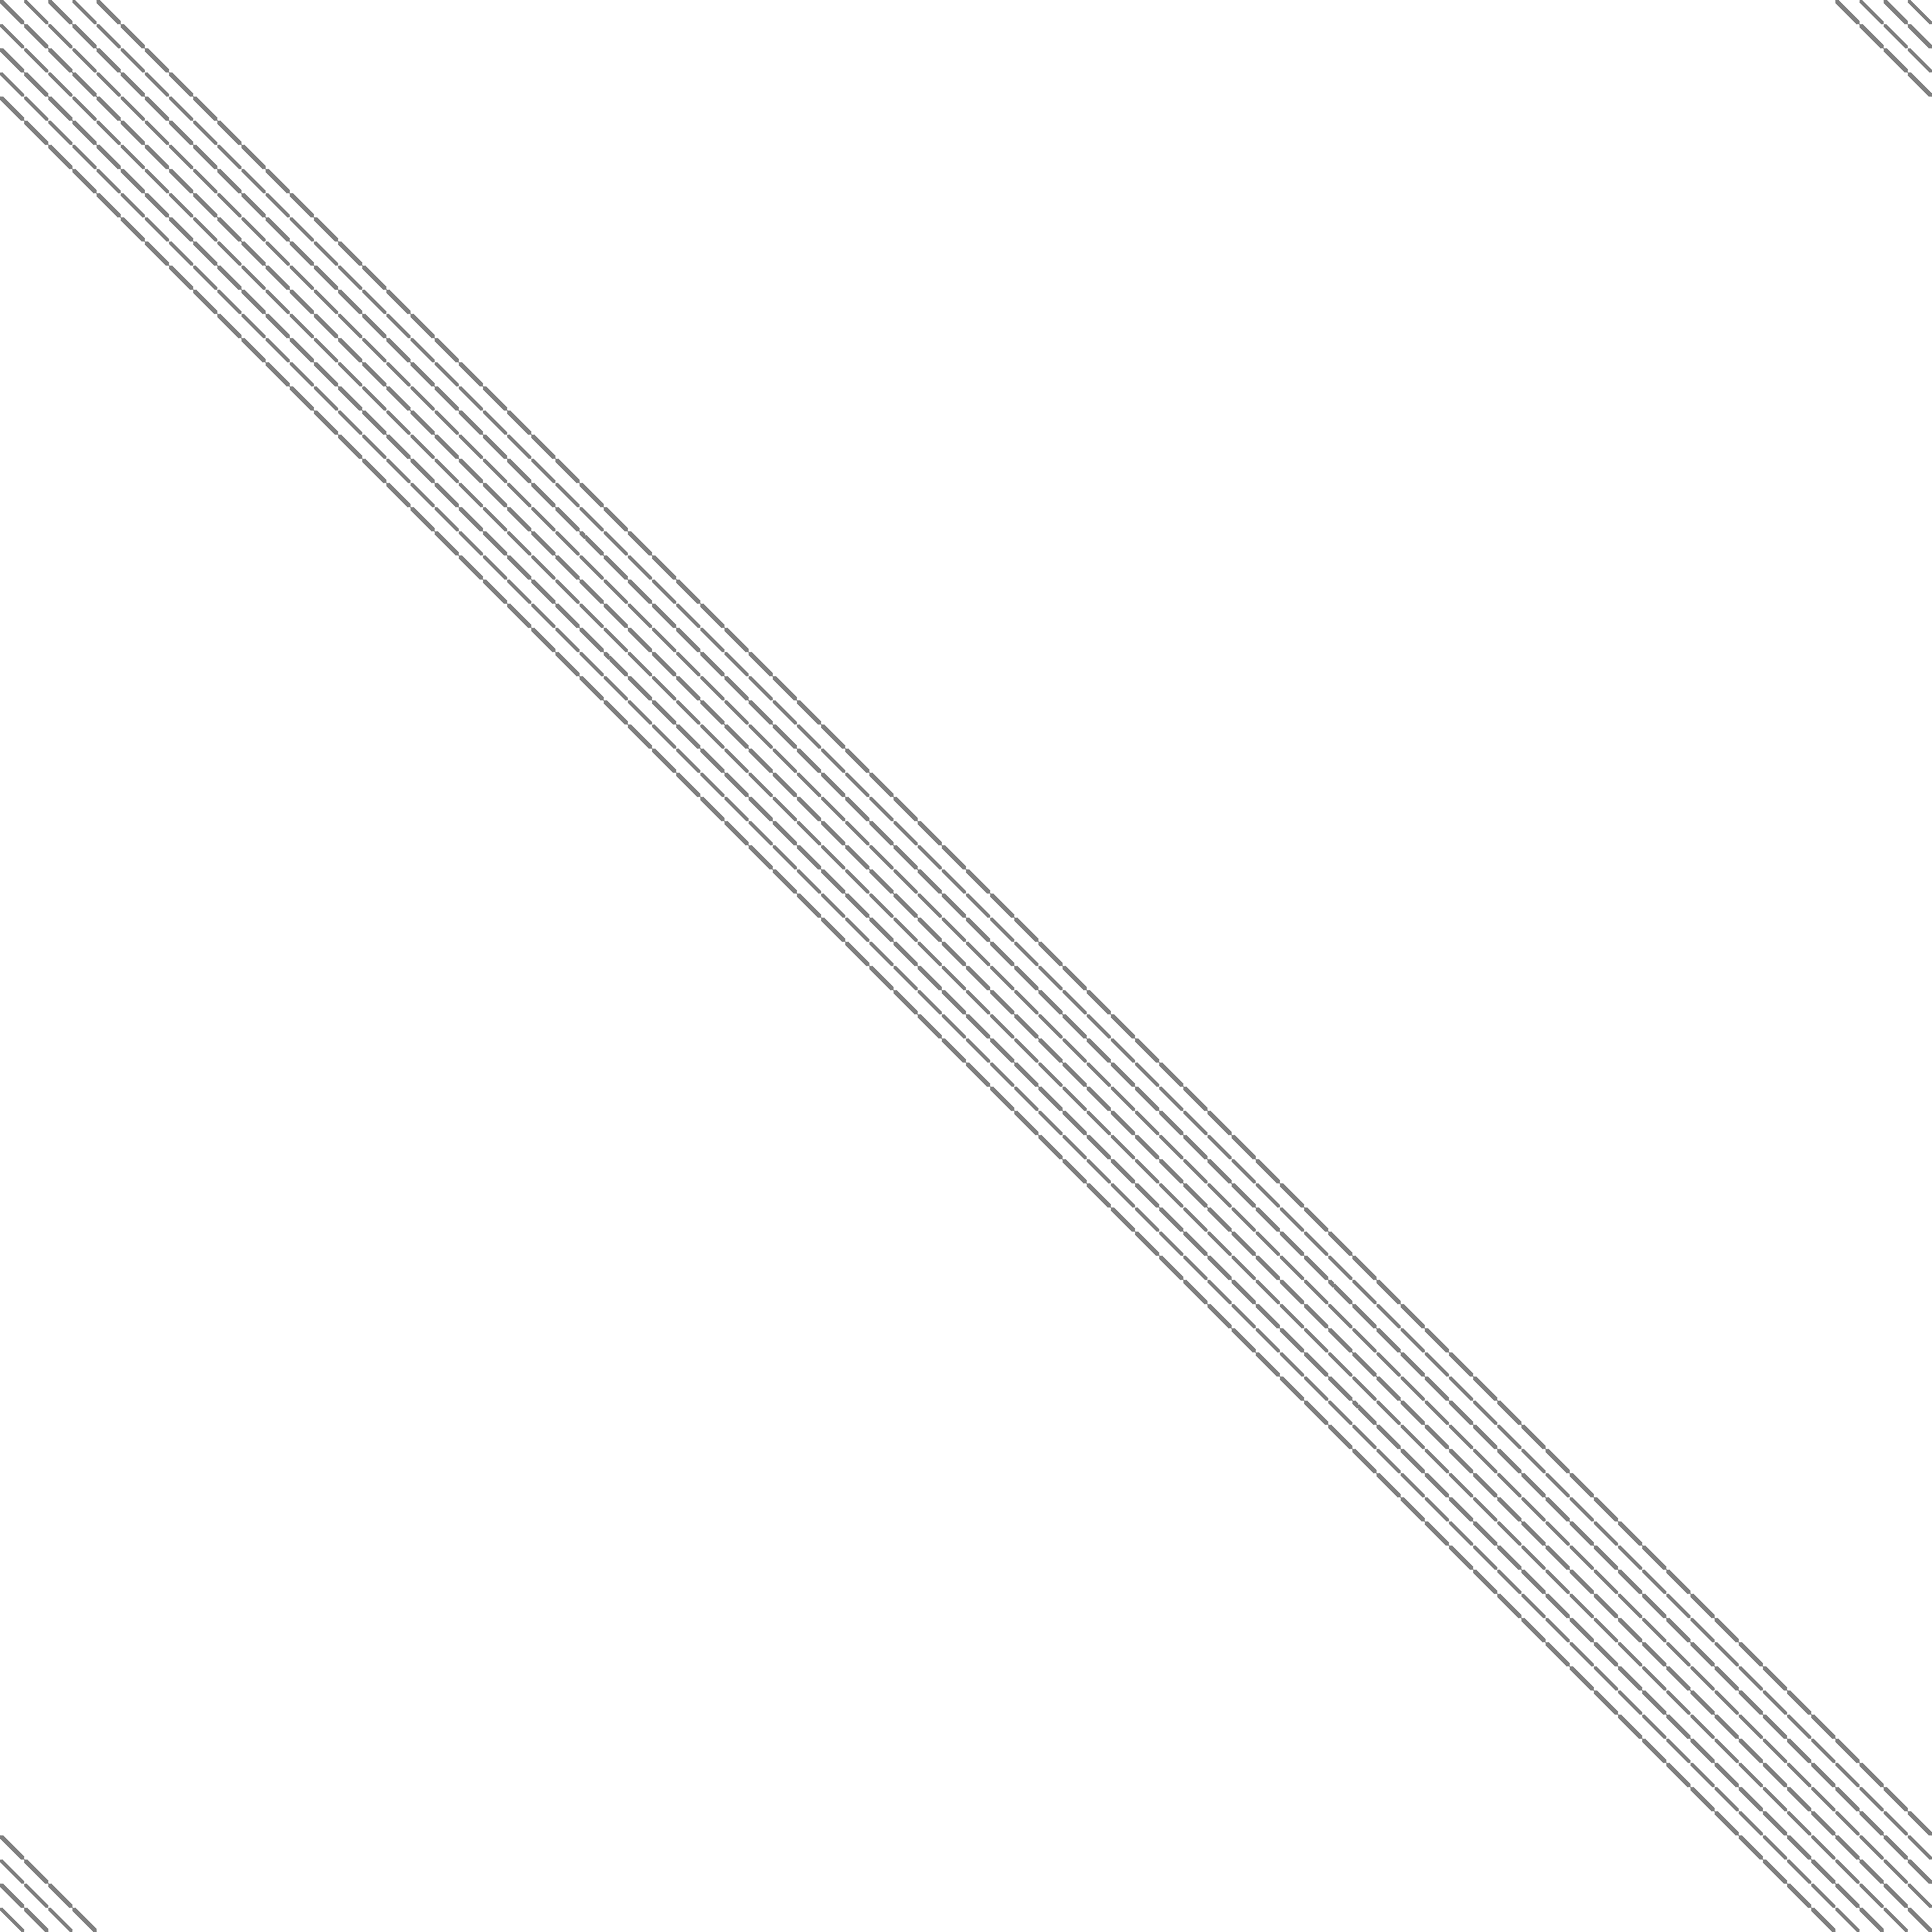

In [10]:
import plotly.express as px
z = np.where(abs(mm.M.toarray()) > 1e-6, 0, 1).astype(np.bool)
fig = px.imshow(z, binary_string=True)
fig.show()

<!-- ======= Bibliography ======= -->



1. <div id="Kalvoda2020"></div> **T. Kalvoda, D. Krejcirik and K. Zahradová**. 
    Effective Quantum Dynamics on the Möbius Strip,
    *Journal of Physics A: Mathematical and Theoretical*,
    53(37),
    pp. 375201,
    [doi: 10.1088/1751-8121/ab8b3a](http://dx.doi.org/10.1088/1751-8121/ab8b3a),
    2020.